# **DATA EXPLORATION: Fires in Greece 2017-2021**

                                                                                                            A project of:
                                                                                                            Michailangelos Pierratos

# Description of Data and Purpose

This is an attempt to analyze the data of wildfires in Greece during the period 2017-2021 and extract insights about trends in the severity of the fires, the areas mostly affected, the reaction of the fire department and perhaps more on the way. The data were provided by the National Greek Fire Department: https://www.fireservice.gr/el/synola-dedomenon

This project was motivated by the devastating severity of the recent wildfires in Greece during the summer of 2021 in places such as Euvoia and Elia. 

## Contents

***
* **Section 0: *Data extraction***
* **Section 1: *Data cleaning***
* **Section 2: *Severity measure, duration and further cleaning***
* **Section 3: *Comparing months in terms of number and severity of fires recorded***
* **Section 4: *Comparing times of the day in terms of number and severity of fires recorded***
* **Section 5: *What was the response of the fire departments across Greece?***
* **Section 6: *Probability of catastrophic fires***
* **Section 7: *What percentage of Euvoia and Greece was burnt in these wildfires?***
* **Section 8: *Total help-duration linear regression | A taste of machine learning***
* **Section 9: *Preparing the data for Tableau***
***

## Section 0: Data extraction

Let us first import our **main libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geocoder
import os

Then, we need to store the data into a pandas data frame

In [6]:
files = [file for file in os.listdir('C:/VSCode/Python/Projects/ProjectFires')]

fires=pd.DataFrame()

for file in files:
    current = pd.read_excel('C:/VSCode/Python/Projects/ProjectFires/'+file)
    fires = pd.concat([fires, current])

To begin with, have a quick look at the data

In [7]:
fires.sample(10)

,Υπηρεσία,Νομός,Ημερ/νία Έναρξης,Ώρα Έναρξης,Ημερ/νία Κατασβεσης,Ώρα Κατάσβεσης,Δασαρχείο,Δήμος,Περιοχή,Διεύθυνση,...,Α/Φ CL415,Α/Φ CL215,Α/Φ PZL,Α/Φ GRU.,Α/Α ΕΓΓΡΑΦΗΣ,Α/Α ENGAGE,X-ENGAGE,Y-ENGAGE,ΜΙΣΘ. ΕΛΙΚΟΠΤ.,ΜΙΣΘ. ΑΕΡΟΣΚ.
2498,Π.Υ. ΚΑΤΕΡΙΝΗΣ,ΠΙΕΡΙΑΣ,2021-07-24,11:40,2021-07-24,12:58,NaN,Δ. ΠΥΔΝΑΣ-ΚΟΛΙΝΔΡΟΥ,ΜΕΘΩΝΗ,ΑΓ.ΠΕΡΙΟΧΗ ΜΕΘΩΝΗ - ΜΑΚΡΥΓΙΑΛΟΣ,...,0.0,0.0,0.0,0.0,1681352.0,874053.0,22.596636,40.441135,0.0,0.0
7219,Π.Υ. ΚΑΛΑΜΑΤΑΣ,ΜΕΣΣΗΝΙΑΣ,2017-09-04,09:45,2017-09-09,22:45,ΚΑΛΑΜΑΤΑΣ,Δ. ΚΑΛΑΜΑΤΑΣ,NaN,ΜΑΧΑΛΑΣ ΑΛΑΓΟΝΙΑΣ,...,0.0,2.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8400,Π.Κ. ΚΑΛΛΟΝΗΣ,ΛΕΣΒΟΥ,2019-12-10,16:56,2019-12-10,17:50,Δ/ΝΣΗ ΔΑΣΩΝ ΛΕΣΒΟΥ,Δ. ΔΥΤΙΚΗΣ ΛΕΣΒΟΥ,ΚΑΛΛΟΝΗ,ΠΕΤΣΟΦΑΣ,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2830,Π.Υ. ΚΑΛΑΒΡΥΤΩΝ,ΑΧΑΙΑΣ,2020-03-20,19:15,NaT,NaN,NaN,Δ. ΚΑΛΑΒΡΥΤΩΝ,NaN,ΤΚ ΠΑΓΚΡΑΤΙΟΥ,...,0.0,0.0,0.0,0.0,1547909.0,0.0,0.000000,0.000000,NaN,NaN
1504,Π.Κ. ΑΡΝΑΙΑΣ,ΧΑΛΚΙΔΙΚΗΣ,2019-03-29,19:30,NaT,NaN,ΑΡΝΑΙΑΣ,Δ. ΑΡΙΣΤΟΤΕΛΗ,ΜΕΓΑΛΗ ΠΑΝΑΓΙΑ,Δ.Κ Μ.ΠΑΝΑΓΙΑΣ,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9623,Π.Κ. ΚΑΣΣΑΝΔΡΑΣ,ΧΑΛΚΙΔΙΚΗΣ,2020-10-16,20:10,NaT,NaN,NaN,Δ. ΚΑΣΣΑΝΔΡΑΣ,NaN,ΑΜΠΑΡΕΣ - ΛΙΜΝΕΣ ΣΑΝΗ,...,0.0,0.0,0.0,0.0,1601755.0,797253.0,23.332588,40.136388,NaN,NaN
2491,Π.Κ. ΡΟΔΟΛΙΒΟΥΣ,ΣΕΡΡΩΝ,2020-03-14,14:10,NaT,NaN,NaN,Δ. ΑΜΦΙΠΟΛΗΣ,ΗΛΙΟΚΩΜΗ,ΟΡΟΣ ΠΑΓΓΑΙΟ,...,0.0,0.0,0.0,0.0,1547388.0,734500.0,24.061212,40.962069,NaN,NaN
11408,Π.Υ. ΒΙ.ΠΕ. ΠΑΤΡΩΝ,ΑΧΑΙΑΣ,2020-11-26,18:22,NaT,NaN,NaN,Δ. ΔΥΤΙΚΗΣ ΑΧΑΪΑΣ,NaN,ΑΓΙΟΙ ΑΠΟΣΤΟΛΟΙ,...,0.0,0.0,0.0,0.0,1619107.0,808332.0,21.481709,38.121705,NaN,NaN
8345,Π.Υ. ΑΡΓΟΣΤΟΛΙΟΥ,ΚΕΦΑΛΛΟΝΙΑΣ,2020-09-10,22:03,NaT,NaN,NaN,Δ. ΑΡΓΟΣΤΟΛΙΟΥ,NaN,ΣΚΑΛΑ-ΑΠΟΣΤΟΛΑΤΑ,...,0.0,0.0,0.0,0.0,1622587.0,785456.0,20.808956,38.102225,NaN,NaN
1765,Π.Υ. ΧΙΟΥ,ΧΙΟΥ,2020-02-26,15:59,2020-02-26,17:38,ΧΙΟΥ,Δ. ΧΙΟΥ,ΧΙΟΣ,ΧΙΟΣ,...,0.0,0.0,0.0,0.0,1543869.0,729818.0,26.117750,38.417892,NaN,NaN


In [8]:
fires.columns

Index(['Υπηρεσία', 'Νομός', 'Ημερ/νία Έναρξης', 'Ώρα Έναρξης',
       'Ημερ/νία Κατασβεσης', 'Ώρα Κατάσβεσης', 'Δασαρχείο', 'Δήμος',
       'Περιοχή', 'Διεύθυνση', 'Δάση', 'Δασική Έκταση', 'Άλση',
       'Χορτ/κές Εκτάσεις', 'Καλάμια - Βάλτοι', 'Γεωργικές Εκτάσεις',
       'Υπολλείματα Καλλιεργειών', 'Σκουπι-δότοποι', 'ΠΥΡΟΣ. ΣΩΜΑ',
       'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ', 'ΕΘΕΛΟ-ΝΤΕΣ', 'ΣΤΡΑΤΟΣ', 'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ',
       'ΠΥΡΟΣ. ΟΧΗΜ.', 'ΟΧΗΜ. ΟΤΑ', 'ΒΥΤΙΟ- ΦΟΡΑ', 'ΜΗΧΑΝΗ-ΜΑΤΑ',
       'ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL', 'Α/Φ GRU.',
       'Α/Α ΕΓΓΡΑΦΗΣ', 'Α/Α ENGAGE', 'X-ENGAGE', 'Y-ENGAGE', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.',
       'ΜΙΣΘ. ΑΕΡΟΣΚ.'],
      dtype='object')

## Section 1: Data Cleaning

Before we start cleaning the data, we should rename the columns in english

In [9]:
fires = fires.rename(columns={'Νομός':'District','Ημερ/νία Έναρξης':'start_date','Ώρα Έναρξης':'start_time','Ημερ/νία Κατασβεσης':'end_date',
                                'Ώρα Κατάσβεσης':'end_time','Δάση':'forests','Δασική Έκταση':'semi_forests','Άλση':'groves','Χορτ/κές Εκτάσεις':
                                'grass','Καλάμια - Βάλτοι':'swamps','Γεωργικές Εκτάσεις':'farmland','Υπολλείματα Καλλιεργειών':'farm_leftovers',
                                'Σκουπι-δότοποι':'wastelands','ΠΥΡΟΣ. ΣΩΜΑ':'firefighters','ΕΘΕΛΟ-ΝΤΕΣ':'volunteers','X-ENGAGE':'longitude',
                                'Y-ENGAGE':'latitude','ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ':'on-foot','ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ':'other forces','ΣΤΡΑΤΟΣ':'army'})

In [10]:
fires.columns

Index(['Υπηρεσία', 'District', 'start_date', 'start_time', 'end_date',
       'end_time', 'Δασαρχείο', 'Δήμος', 'Περιοχή', 'Διεύθυνση', 'forests',
       'semi_forests', 'groves', 'grass', 'swamps', 'farmland',
       'farm_leftovers', 'wastelands', 'firefighters', 'on-foot', 'volunteers',
       'army', 'other forces', 'ΠΥΡΟΣ. ΟΧΗΜ.', 'ΟΧΗΜ. ΟΤΑ', 'ΒΥΤΙΟ- ΦΟΡΑ',
       'ΜΗΧΑΝΗ-ΜΑΤΑ', 'ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL',
       'Α/Φ GRU.', 'Α/Α ΕΓΓΡΑΦΗΣ', 'Α/Α ENGAGE', 'longitude', 'latitude',
       'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.'],
      dtype='object')

We now make a copy of our data frame, keeping only the columns of interest

In [11]:
columns=['District','start_date','start_time','end_date','end_time','latitude','longitude','forests','semi_forests','groves','grass','swamps','farmland','farm_leftovers','wastelands','firefighters','volunteers','other forces','army','on-foot']

fire = fires[columns].copy()

In [12]:
fire.index = [x for x in range(1, len(fire.values)+1)]
fire

,District,start_date,start_time,end_date,end_time,latitude,longitude,forests,semi_forests,groves,grass,swamps,farmland,farm_leftovers,wastelands,firefighters,volunteers,other forces,army,on-foot
1,ΑΤΤΙΚΗΣ,2017-04-09,12:44,2017-04-09,16:31,NaN,NaN,0.0,2.00,0.0,0.0,0.0,0.00,0.00,0.0,6.0,6.0,0.0,0.0,0.0
2,ΑΤΤΙΚΗΣ,2017-07-05,17:16,2017-07-08,08:05,NaN,NaN,0.0,18.00,0.0,0.0,0.0,0.00,0.00,0.0,14.0,14.0,6.0,0.0,6.0
3,ΑΤΤΙΚΗΣ,2017-08-13,16:16,2017-09-11,20:00,NaN,NaN,5000.0,15000.00,0.0,0.0,0.0,500.00,0.00,0.0,280.0,38.0,7.0,50.0,58.0
4,ΑΤΤΙΚΗΣ,2017-10-24,05:17,2017-10-24,08:06,NaN,NaN,0.0,1.50,0.0,0.0,0.0,0.00,0.00,0.0,2.0,2.0,0.0,0.0,0.0
5,ΑΤΤΙΚΗΣ,2017-10-24,08:23,2017-10-24,19:30,NaN,NaN,0.0,1.50,0.0,0.0,0.0,0.00,0.00,0.0,20.0,10.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49171,ΖΑΚΥΝΘΟΥ,2021-03-15,15:05,2021-03-15,16:00,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.05,0.00,0.0,3.0,0.0,0.0,0.0,0.0
49172,ΖΑΚΥΝΘΟΥ,2021-03-26,12:42,NaT,NaN,37.781536,20.681007,0.0,1.00,0.0,0.0,0.0,0.00,0.00,0.0,12.0,0.0,0.0,0.0,0.0
49173,ΖΑΚΥΝΘΟΥ,2021-04-03,16:04,2021-04-03,20:16,37.877000,20.653577,0.0,1.00,0.0,0.0,0.0,0.00,0.00,0.0,6.0,0.0,0.0,0.0,0.0
49174,ΖΑΚΥΝΘΟΥ,2021-05-03,23:35,2021-05-04,00:46,37.872951,20.724452,0.0,0.05,0.0,0.0,0.0,0.00,0.00,0.0,3.0,0.0,0.0,0.0,0.0


In [13]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49175 entries, 1 to 49175
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   District        49167 non-null  object        
 1   start_date      49175 non-null  datetime64[ns]
 2   start_time      49175 non-null  object        
 3   end_date        38878 non-null  datetime64[ns]
 4   end_time        38961 non-null  object        
 5   latitude        20309 non-null  float64       
 6   longitude       20309 non-null  float64       
 7   forests         49175 non-null  float64       
 8   semi_forests    49175 non-null  float64       
 9   groves          49175 non-null  float64       
 10  grass           49175 non-null  float64       
 11  swamps          49175 non-null  float64       
 12  farmland        49175 non-null  float64       
 13  farm_leftovers  49175 non-null  float64       
 14  wastelands      49175 non-null  float64       
 15  fi

We notice that **most null values** are found in the **latitude**, **longitude** columns. This is natural since these cannot be specified unless the beginning
of the fire could be recorded, which is obviously not easy. We will also **replace** the **null values** with **0** in the **firefighters**, **volunteers** columns since these were probably zeros that did not get registered. The rest of the null values will be left as they are for now (!)

In [14]:
fire.fillna({'firefighters':0,'volunteers':0,'army':0,'other forces':0,'on-foot':0},inplace=True)

In [15]:
fire[['firefighters','volunteers','army','other forces','on-foot']].isna().sum()

firefighters    0
volunteers      0
army            0
other forces    0
on-foot         0
dtype: int64

We had better also **drop duplicate rows**.

In [16]:
fire.drop_duplicates(inplace=True)
fire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49159 entries, 1 to 49175
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   District        49151 non-null  object        
 1   start_date      49159 non-null  datetime64[ns]
 2   start_time      49159 non-null  object        
 3   end_date        38865 non-null  datetime64[ns]
 4   end_time        38948 non-null  object        
 5   latitude        20307 non-null  float64       
 6   longitude       20307 non-null  float64       
 7   forests         49159 non-null  float64       
 8   semi_forests    49159 non-null  float64       
 9   groves          49159 non-null  float64       
 10  grass           49159 non-null  float64       
 11  swamps          49159 non-null  float64       
 12  farmland        49159 non-null  float64       
 13  farm_leftovers  49159 non-null  float64       
 14  wastelands      49159 non-null  float64       
 15  fi

Now we define two **new columns** that refer specifically to the **month** and the **year** that the fire started respectively

In [17]:
fire['start_month'] = fire.start_date.dt.month
fire['start_year'] = fire.start_date.dt.year

In [18]:
fire.describe()

,latitude,longitude,forests,semi_forests,groves,grass,swamps,farmland,farm_leftovers,wastelands,firefighters,volunteers,other forces,army,on-foot,start_month,start_year
count,20307.000000,20307.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000,49159.000000
mean,38.046351,22.340671,12.839237,13.315208,0.010416,3.677466,0.952400,9.535481,3.164569,0.078276,5.412641,0.179031,0.263451,0.023699,0.469192,6.505340,2019.043085
std,5.814645,3.639815,1379.585155,574.004146,1.032572,88.185005,14.352412,830.944026,114.793155,9.144008,13.280788,1.430797,6.144895,0.886282,4.991370,3.008377,1.420333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2017.000000
25%,37.675759,21.648680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2018.000000
50%,38.615238,22.402786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2019.000000
75%,40.486237,23.553328,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2020.000000
max,41.736240,28.237268,288428.470000,65650.000000,200.000000,16000.560000,2000.000000,170224.270000,23960.000000,2000.000000,1513.000000,88.000000,1270.000000,101.000000,620.000000,12.000000,2021.000000


We see that there are still some wrongly registered latitudes and longitudes since the minimum values, **0 latitude** and **0 longitude** are **outside** of **Greece**. Additionally, we have not yet considered the existence of outliers in our data. We will treat the latter later, so let us focus on the first problem.\
\
We define a dataframe that contains the wrongly registered latitudes and longitudes.

In [19]:
wrong_long_lat = fire[fire.longitude==0]
wrong_long_lat

,District,start_date,start_time,end_date,end_time,latitude,longitude,forests,semi_forests,groves,...,farmland,farm_leftovers,wastelands,firefighters,volunteers,other forces,army,on-foot,start_month,start_year
27863,ΡΟΔΟΠΗΣ,2020-01-01,14:33,2020-01-01,15:15,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2020
27864,ΕΒΡΟΥ,2020-01-01,17:10,NaT,NaN,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2020
27865,ΙΩΑΝΝΙΝΩΝ,2020-01-01,17:25,2020-01-01,17:25,0.0,0.0,0.01,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2020
27866,ΙΩΑΝΝΙΝΩΝ,2020-01-01,17:45,2020-01-01,19:30,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1,2020
27867,ΑΧΑΙΑΣ,2020-01-01,13:12,NaT,NaN,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39500,ΗΡΑΚΛΕΙΟΥ,2020-12-02,17:15,2020-12-02,18:00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,12,2020
39577,ΗΡΑΚΛΕΙΟΥ,2020-12-11,12:50,NaT,NaN,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.5,2.0,0.0,0.0,0.0,0.0,12,2020
39609,ΕΥΒΟΙΑΣ,2020-12-23,12:13,2020-12-23,17:10,0.0,0.0,0.00,0.5,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,12,2020
39745,ΑΤΤΙΚΗΣ,2021-06-16,18:19,2021-06-16,19:20,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,6,2021


Notice that despite the missing coordinates, the **district information** is still there. We could therefore **retrieve** these latitudes and longitudes (approximately, but within an irrelevant error since we are mostly interested in general questions at the district level) by using a **geocoding** library (geopy: https://geopy.readthedocs.io/en/stable/) to find for each district its **capital**'s coordinates.\
The information about the capital town of each district can be parsed from a **wikipedia url**. Finally we will also need a **translation** library (translators: https://pypi.org/project/translators/) to translate the greek names to english for our geocoding to work.

In [20]:
from geopy.geocoders import Nominatim
import geopy

geopy.geocoders.options.default_user_agent = "my-application"
geolocator = Nominatim(user_agent='myGeocoder')

In [21]:
html_url = 'https://el.wikipedia.org/wiki/%CE%9D%CE%BF%CE%BC%CE%BF%CE%AF_%CF%84%CE%B7%CF%82_%CE%95%CE%BB%CE%BB%CE%AC%CE%B4%CE%B1%CF%82' #page that contains the capital-district table

units = pd.read_html(html_url) #total data parsed from url
nomoi = units[2]['Αττική'] #relevant data
nomoi_prot = nomoi[['Νομός','Έδρα νομού']]

nomoi_prot = nomoi_prot.replace('Νομός ','',regex=True) #rename all districts from the "nomos <name>" format to the "<name>" format
nomoi_prot

,Νομός,Έδρα νομού
0,Αθηνών,Αθήνα
1,Ανατολικής Αττικής,Παλλήνη
2,Δυτικής Αττικής,Ελευσίνα
3,Πειραιά,Πειραιάς
4,Στερεά Ελλάδα,Στερεά Ελλάδα
...,...,...
76,Καστοριάς,Καστοριά
77,Κοζάνης,Κοζάνη
78,Οικουμενικό Πατριαρχείο Κωνσταντινουπόλεως,Οικουμενικό Πατριαρχείο Κωνσταντινουπόλεως
79,Νομός,Έδρα νομού


In [22]:
import difflib #for finding closest match of a string from a list of strings
import translators as ts 

Using state North Holland server backend.


In [23]:
name_location = {}
name_location_other = {}

for name in wrong_long_lat.District.unique():   

    if len(difflib.get_close_matches(name.lower(),nomoi_prot['Νομός']))==0:
        continue
    
    capital_in_greek = list(nomoi_prot[nomoi_prot['Νομός']==difflib.get_close_matches(name.lower(),nomoi_prot['Νομός'])[-1]]['Έδρα νομού'])[0]
    capital_in_english = ts.google(capital_in_greek+'ς', from_language='el', to_language='en') #the addition of the ς is a trick used to make the engine translate these into better-recognizable names from the geopy library
    region_in_english = ts.google(name, from_language='el', to_language='en')

    location_of_capital = geolocator.geocode(capital_in_english+', '+region_in_english+', Greece')
    location_of_capital_other = geolocator.geocode(capital_in_english+', Greece')

    if location_of_capital!=None:
        name_location[name]=[location_of_capital.latitude,location_of_capital.longitude]
        print(f'{name},{name_location[name]}')

    elif location_of_capital_other!=None:
        name_location_other[name]=[location_of_capital_other.latitude,location_of_capital_other.longitude]
        print(f'{name},{name_location_other[name]}')

for ind in list(fire[fire.latitude==0].index):
    if fire[fire.latitude==0].loc[ind,'District'] in name_location:
        fire.loc[ind,'latitude'],fire.loc[ind,'longitude'] = name_location[fire.loc[ind,'District']]
    elif fire.loc[ind,'District'] in name_location_other:
        fire.loc[ind,'latitude'],fire.loc[ind,'longitude'] = name_location_other[fire.loc[ind,'District']]

ΡΟΔΟΠΗΣ,[41.1182, 25.4035708]
ΕΒΡΟΥ,[36.4230252, 28.2100905]
ΙΩΑΝΝΙΝΩΝ,[39.6639818, 20.8522784]
ΑΧΑΙΑΣ,[38.246242, 21.7350847]
ΔΡΑΜΑΣ,[41.1499443, 24.1468286]
ΠΡΕΒΕΖΗΣ,[38.9589226, 20.7496811]
ΚΕΡΚΥΡΑΣ,[39.591337, 19.859618918733858]
ΜΕΣΣΗΝΙΑΣ,[37.0377582, 22.1109392]
ΦΘΙΩΤΙΔΑΣ,[38.8993832, 22.433582]
ΚΟΖΑΝΗΣ,[40.3007259, 21.7883119]
ΛΑΡΙΣΑΣ,[39.5477753, 22.2998096]
ΧΑΝΙΩΝ,[35.5120831, 24.0191544]
ΘΕΣΣΑΛΟΝΙΚΗΣ,[40.7252582, 22.9234345]
ΕΥΒΟΙΑΣ,[38.4623664, 23.5946877]
ΛΑΚΩΝΙΑΣ,[37.0738592, 22.4286462]
ΚΑΒΑΛΑΣ,[41.0248811, 24.3400925]
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,[38.3686353, 21.4283544]
ΞΑΝΘΗΣ,[41.1380289, 24.8862688]
ΑΡΤΑΣ,[39.3660304, 21.9287519]
ΛΕΣΒΟΥ,[39.1037355, 26.554788]
ΚΥΚΛΑΔΩΝ,[37.444567, 24.9423162]
ΚΙΛΚΙΣ,[40.9935874, 22.8741455]
ΚΟΡΙΝΘΙΑΣ,[37.9385413, 22.9273768]
ΑΡΓΟΛΙΔΟΣ,[37.5659229, 22.8068782]
ΚΑΡΔΙΤΣΑΣ,[39.5477753, 22.2998096]
ΣΑΜΟΥ,[37.72461615, 26.819291891109838]
ΗΜΑΘΙΑΣ,[40.5215342, 22.2036834]
ΠΕΛΛΑΣ,[40.8009492, 22.050117]
ΒΟΙΩΤΙΑΣ,[38.438148, 22.8790519]
ΛΑΣΙΘΙΟΥ,[39.42424

In [24]:
fire[fire.latitude==0]

,District,start_date,start_time,end_date,end_time,latitude,longitude,forests,semi_forests,groves,...,farmland,farm_leftovers,wastelands,firefighters,volunteers,other forces,army,on-foot,start_month,start_year
27880,ΚΕΦΑΛΛΟΝΙΑΣ,2020-01-02,14:25,2020-01-02,18:44,0.0,0.0,0.0,10.0,0.0,...,0.00,0.0,0.0,9.0,2.0,0.0,0.0,0.0,1,2020
27984,ΧΙΟΥ,2020-01-06,11:45,2020-01-06,12:00,0.0,0.0,0.0,0.0,0.0,...,0.00,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2020
28021,ΑΤΤΙΚΗΣ,2020-01-07,14:44,NaT,NaN,0.0,0.0,0.0,3.0,0.0,...,0.00,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1,2020
28173,ΗΡΑΚΛΕΙΟΥ,2020-01-12,18:18,2020-01-12,20:00,0.0,0.0,0.0,0.0,0.0,...,0.05,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1,2020
28199,ΧΙΟΥ,2020-01-14,17:01,2020-01-14,17:15,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38823,ΗΡΑΚΛΕΙΟΥ,2020-11-18,11:30,2020-11-18,15:15,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,6.0,0.0,0.0,0.0,0.0,11,2020
39500,ΗΡΑΚΛΕΙΟΥ,2020-12-02,17:15,2020-12-02,18:00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,12,2020
39577,ΗΡΑΚΛΕΙΟΥ,2020-12-11,12:50,NaT,NaN,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.5,2.0,0.0,0.0,0.0,0.0,12,2020
39745,ΑΤΤΙΚΗΣ,2021-06-16,18:19,2021-06-16,19:20,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,2.0,0.0,1.0,0.0,0.0,6,2021


 We now also add two more columns: one for the **total area** that was burned and one for the **total help** from the fire department in terms of firefighters

In [25]:
fire['total_area'] = fire['forests']+\
                    fire['semi_forests']+\
                    fire['groves']+\
                    fire['grass']+\
                    fire['swamps']+\
                    fire['farmland']+\
                    fire['farm_leftovers']+\
                    fire['wastelands']

In [26]:
fire['total_help'] = fire['firefighters']+fire['volunteers']+fire['army']+fire['other forces']+fire['on-foot']
fire['total_firefighters'] = fire['firefighters']+fire['volunteers']+fire['on-foot']

## Section 2: Severity measure, duration and further cleaning

### Duration:
First create a new column that refers to the **duration** of each fire

In [27]:
fire.start_time = pd.to_timedelta(fire.start_time+':00')
fire.end_time = pd.to_timedelta(fire.end_time+':00')

In [28]:
fire['start_date']=fire['start_date']+fire['start_time']

In [29]:
fire['end_date'] = fire['end_date']+fire['end_time']

In [30]:
fire['duration']=(fire['end_date']-fire['start_date']).dt.total_seconds()/60/60 #Duration in hours
fire

,District,start_date,start_time,end_date,end_time,latitude,longitude,forests,semi_forests,groves,...,volunteers,other forces,army,on-foot,start_month,start_year,total_area,total_help,total_firefighters,duration
1,ΑΤΤΙΚΗΣ,2017-04-09 12:44:00,0 days 12:44:00,2017-04-09 16:31:00,0 days 16:31:00,NaN,NaN,0.0,2.00,0.0,...,6.0,0.0,0.0,0.0,4,2017,2.00,12.0,12.0,3.783333
2,ΑΤΤΙΚΗΣ,2017-07-05 17:16:00,0 days 17:16:00,2017-07-08 08:05:00,0 days 08:05:00,NaN,NaN,0.0,18.00,0.0,...,14.0,6.0,0.0,6.0,7,2017,18.00,40.0,34.0,62.816667
3,ΑΤΤΙΚΗΣ,2017-08-13 16:16:00,0 days 16:16:00,2017-09-11 20:00:00,0 days 20:00:00,NaN,NaN,5000.0,15000.00,0.0,...,38.0,7.0,50.0,58.0,8,2017,20500.00,433.0,376.0,699.733333
4,ΑΤΤΙΚΗΣ,2017-10-24 05:17:00,0 days 05:17:00,2017-10-24 08:06:00,0 days 08:06:00,NaN,NaN,0.0,1.50,0.0,...,2.0,0.0,0.0,0.0,10,2017,1.50,4.0,4.0,2.816667
5,ΑΤΤΙΚΗΣ,2017-10-24 08:23:00,0 days 08:23:00,2017-10-24 19:30:00,0 days 19:30:00,NaN,NaN,0.0,1.50,0.0,...,10.0,0.0,0.0,11.0,10,2017,1.50,41.0,41.0,11.116667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49171,ΖΑΚΥΝΘΟΥ,2021-03-15 15:05:00,0 days 15:05:00,2021-03-15 16:00:00,0 days 16:00:00,NaN,NaN,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,3,2021,0.05,3.0,3.0,0.916667
49172,ΖΑΚΥΝΘΟΥ,2021-03-26 12:42:00,0 days 12:42:00,NaT,NaT,37.781536,20.681007,0.0,1.00,0.0,...,0.0,0.0,0.0,0.0,3,2021,1.00,12.0,12.0,NaN
49173,ΖΑΚΥΝΘΟΥ,2021-04-03 16:04:00,0 days 16:04:00,2021-04-03 20:16:00,0 days 20:16:00,37.877000,20.653577,0.0,1.00,0.0,...,0.0,0.0,0.0,0.0,4,2021,1.00,6.0,6.0,4.200000
49174,ΖΑΚΥΝΘΟΥ,2021-05-03 23:35:00,0 days 23:35:00,2021-05-04 00:46:00,0 days 00:46:00,37.872951,20.724452,0.0,0.05,0.0,...,0.0,0.0,0.0,0.0,5,2021,0.05,3.0,3.0,1.183333


### Severity:
We move on to defining a measure of **severity**, according to which (this is arbitrary, but realistic!):
* Fires that burnt **less than 20** acres have a **very low** severity.\
* Fires that burnt **more than 20** and **less than 200** acres have a **low** severity.\
* Fires that burnt **more than 200** and **less than 1000** acres have a **moderate** severity.\
* Fires that burnt **more than 1000** and **less than 10000** acres have a **high** severity.\
* Fires that burnt **more than 10000** acres have a **catastrophic** severity.

In [31]:
severity_groupings = {'very_low':[0,20],'low':[20,200],'moderate':[200,1000],'high':[1000,10000],'catastrophic':[10000,1e9]}

In [32]:
for severity in severity_groupings:
    fire.loc[fire.total_area>=severity_groupings[severity][0],'Severity'] = severity

### Negative Values:

We should now take care of the negative duration values that are of course unphysical.

In [33]:
print(f'{round(fire[fire.duration<0].count().District / fire.count().District *100,2)}% of rows have negative duration')

0.58% of rows have negative duration


These will be treated under the assumption that they were all caused by the mistake of entering the start_date on the end_date and vice verca. We will also define a data frame that contains all the initial positive duration data from the fire data frame so that we can then check that they are highly correlated. Either way, this part does not matter that much since we will not be working that extensively with the duration column.

In [34]:
pos_dur_fire = fire[fire['duration']>0]

In [35]:
pos_dur_fire

,District,start_date,start_time,end_date,end_time,latitude,longitude,forests,semi_forests,groves,...,other forces,army,on-foot,start_month,start_year,total_area,total_help,total_firefighters,duration,Severity
1,ΑΤΤΙΚΗΣ,2017-04-09 12:44:00,0 days 12:44:00,2017-04-09 16:31:00,0 days 16:31:00,NaN,NaN,0.0,2.00,0.0,...,0.0,0.0,0.0,4,2017,2.00,12.0,12.0,3.783333,very_low
2,ΑΤΤΙΚΗΣ,2017-07-05 17:16:00,0 days 17:16:00,2017-07-08 08:05:00,0 days 08:05:00,NaN,NaN,0.0,18.00,0.0,...,6.0,0.0,6.0,7,2017,18.00,40.0,34.0,62.816667,very_low
3,ΑΤΤΙΚΗΣ,2017-08-13 16:16:00,0 days 16:16:00,2017-09-11 20:00:00,0 days 20:00:00,NaN,NaN,5000.0,15000.00,0.0,...,7.0,50.0,58.0,8,2017,20500.00,433.0,376.0,699.733333,catastrophic
4,ΑΤΤΙΚΗΣ,2017-10-24 05:17:00,0 days 05:17:00,2017-10-24 08:06:00,0 days 08:06:00,NaN,NaN,0.0,1.50,0.0,...,0.0,0.0,0.0,10,2017,1.50,4.0,4.0,2.816667,very_low
5,ΑΤΤΙΚΗΣ,2017-10-24 08:23:00,0 days 08:23:00,2017-10-24 19:30:00,0 days 19:30:00,NaN,NaN,0.0,1.50,0.0,...,0.0,0.0,11.0,10,2017,1.50,41.0,41.0,11.116667,very_low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49167,ΖΑΚΥΝΘΟΥ,2021-09-13 18:54:00,0 days 18:54:00,2021-09-13 19:35:00,0 days 19:35:00,37.814890,20.882212,0.0,0.00,0.0,...,0.0,0.0,0.0,9,2021,0.01,2.0,2.0,0.683333,very_low
49168,ΖΑΚΥΝΘΟΥ,2021-12-17 08:30:00,0 days 08:30:00,2021-12-17 10:00:00,0 days 10:00:00,37.692033,20.834445,0.0,0.00,0.0,...,0.0,0.0,0.0,12,2021,0.05,4.0,4.0,1.500000,very_low
49171,ΖΑΚΥΝΘΟΥ,2021-03-15 15:05:00,0 days 15:05:00,2021-03-15 16:00:00,0 days 16:00:00,NaN,NaN,0.0,0.00,0.0,...,0.0,0.0,0.0,3,2021,0.05,3.0,3.0,0.916667,very_low
49173,ΖΑΚΥΝΘΟΥ,2021-04-03 16:04:00,0 days 16:04:00,2021-04-03 20:16:00,0 days 20:16:00,37.877000,20.653577,0.0,1.00,0.0,...,0.0,0.0,0.0,4,2021,1.00,6.0,6.0,4.200000,very_low


In [36]:
fire['duration']=abs(fire['duration'])

In [37]:
pos_dur_fire[pos_dur_fire.Severity=='very_low']['duration'].corr(fire[fire.Severity=='very_low'].duration.sample(len(pos_dur_fire)))

1.0

### Outliers: 
Now before we move on, it is a good time to search for **outliers** in our data and treat them. We need to be mindful though of the test that we are going to use. If we were to **naively** look for outliers in the duration or total area columns, we would almost certainly **destroy** our most important data: the most severe fires that did actually occur. This is because we are dealing with phenomena that are **by definition outliers** in the general trend of fires. This is obvious from the following histogram that shows the number of fires within a specific range of total_area.

In [38]:
import plotly.express as px
px.histogram(fire,x='total_area',nbins=1000)

The most natural way to define outliers, is to **define them seperately within different groups of our initial data**. One way to do that is to only look at the **severity groups** of the fire data each time, and define outliers in the **duration data** with the usual **IQR method**. 
***
To give an example of that:\
We would not of course expect many fires of very_low severity to last more than 1 month but we actually have such cases in our dataset!!

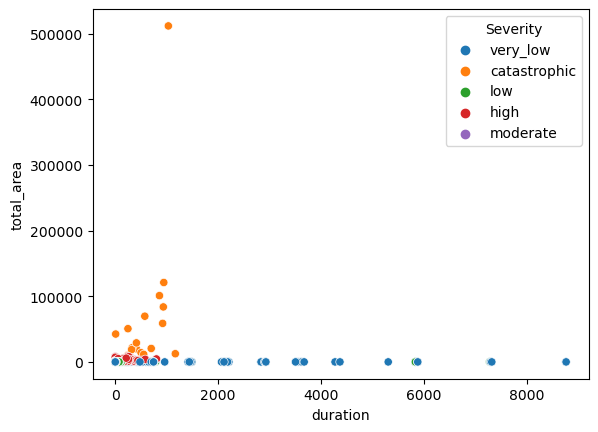

In [39]:
sns.scatterplot(x=fire.duration,y=fire.total_area,hue=fire.Severity)

plt.show()

In [40]:
fire[fire.Severity=='very_low'][fire[fire.Severity=='very_low'].duration>24*30]

,District,start_date,start_time,end_date,end_time,latitude,longitude,forests,semi_forests,groves,...,other forces,army,on-foot,start_month,start_year,total_area,total_help,total_firefighters,duration,Severity
276,ΡΟΔΟΠΗΣ,2017-02-14 13:10:00,0 days 13:10:00,2017-01-14 13:30:00,0 days 13:30:00,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2017,0.10,2.0,2.0,743.666667,very_low
884,ΕΒΡΟΥ,2017-02-17 15:55:00,0 days 15:55:00,2017-07-17 17:30:00,0 days 17:30:00,NaN,NaN,0.0,3.0,0.0,...,0.0,0.0,0.0,2,2017,5.00,8.0,8.0,3601.583333,very_low
5323,ΑΧΑΙΑΣ,2017-01-06 19:20:00,0 days 19:20:00,2017-09-06 19:35:00,0 days 19:35:00,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,1,2017,0.10,4.0,4.0,5832.250000,very_low
5513,ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,2017-05-10 17:20:00,0 days 17:20:00,2017-08-10 18:30:00,0 days 18:30:00,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,5,2017,10.00,2.0,2.0,2209.166667,very_low
5711,ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,2017-04-09 20:30:00,0 days 20:30:00,2017-09-04 21:20:00,0 days 21:20:00,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,4,2017,0.05,2.0,2.0,3552.833333,very_low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47432,ΕΥΒΟΙΑΣ,2021-03-10 14:30:00,0 days 14:30:00,2021-11-10 15:32:00,0 days 15:32:00,38.600488,23.779604,0.0,0.0,0.0,...,0.0,0.0,2.0,3,2021,6.00,7.0,7.0,5881.033333,very_low
47879,ΛΕΣΒΟΥ,2021-10-06 12:55:00,0 days 12:55:00,2021-12-06 17:50:00,0 days 17:50:00,39.224095,25.981187,0.0,0.0,0.0,...,0.0,0.0,0.0,10,2021,1.50,12.0,12.0,1468.916667,very_low
48062,ΗΡΑΚΛΕΙΟΥ,2021-01-17 14:13:00,0 days 14:13:00,2021-02-17 16:35:00,0 days 16:35:00,35.012491,24.874402,0.0,0.0,0.0,...,0.0,0.0,0.0,1,2021,0.20,4.0,4.0,746.366667,very_low
48710,ΛΑΣΙΘΙΟΥ,2021-07-17 16:16:00,0 days 16:16:00,2021-08-17 16:48:00,0 days 16:48:00,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,7,2021,0.10,2.0,2.0,744.533333,very_low


Interestingly though, there is a **pattern** in some of the rows here. A lot of them have the **same start and end day** but obviously different start and end months. Given that our data has been **manually created**, this probably indicates a mistake in the end_date (or start_date) month entry. These cases should be fixed by changing the end month to agree with the start month. The rest of the cases will be changed to agree with the mean of the duration of the rest of the data.\
\
The outlier test will **only** be run for the **low** and **very_low** severity fires, since we do not want to skew the more important data of the high and catastrophic severity fires that are almost entirely good, and for which this test might not be as accurate since the groupings of the high and catastrophic severity correspond to a larger total_area range. 

In [41]:
def outliers_upper_bound(data: list,column: list,num: float)-> float: 
    '''This function finds the outlier upper bound of a dataset based on the data and a number which
    represents the strictness of the IQR test.
    
    Parameters
    data: list. The dataframe where the data for which the upper bound limit needs to be found is.
    columns: list. The column of the data dataframe whose data need to be investigated for outliers.
    num: float, default=10. Number that represents the strictness of the test''' 

    assert len(data)>1, 'Insufficient data'
    assert num>0, 'num must be positive'

    dataset = data[column]
    dataset = dataset.dropna()

    q1, q3= np.percentile(dataset,[25,75])
    IQR = q3 - q1
    lower_bound = q1 -(num * IQR) 
    upper_bound = q3 +(num * IQR)
    mean = dataset.mean()

    assert upper_bound>mean, 'Wrong calculation of upper bound: upper bound<mean'
    
    return upper_bound

In [42]:
from collections import deque

def fix_column(severity: str,column: str,num: int=6):
    ''''This function investigates outliers in the data of either the duration or the total_help columns. In the case of the duration data, it alters
    them either to their obvious typo-hypothesis correction, or to the mean of the data if such typo cannot be easily recognized. In the case of the
    total_help data, they are changed into the mean of the data.

    Parameters
    severity: string. Picks data of fires with a certain severity (low and very_low severity fires are recommended only)
    column: string. The function works only for the total_help and duration columns' data.
    num: integer, default=6. Chooses the strictness by which the outliers are defined'''

    def mean_bound(severity: str,column: str,num: int):
        fire_severity = fire[fire.Severity==severity]
        mean = fire.loc[fire_severity.index][column].mean()
        upper_bound = outliers_upper_bound(fire_severity,column,num)
        return [fire_severity,mean,upper_bound]

    print(f'Investigating fires of {severity} intensity\n')

    fire_severity,mean,upper_bound = mean_bound(severity,column,num)

    print(f'The mean {column} for these fires is={mean}\nThe upper bound limit for non outliers is = {upper_bound}\nAny data points above this limit will be treated as outliers\n')

    outliers_fire = fire_severity[fire_severity[column]>upper_bound]

    print(f'The number of data points above this limit is {outliers_fire.count().District}\n')
 

    if column=='duration':
        
        ndata_above = outliers_fire[outliers_fire.start_date.dt.day==outliers_fire.end_date.dt.day].count().District

        print(f'Of these the number of data points that have the same start day and end day but different months are={ndata_above}')
        print(f'Of these the number of data points that have the same start day as end month and start month as end day are={ndata_above}')

        que_index = deque(list(outliers_fire.index))

        while len(que_index)!=0:
            ind = que_index[0]
            if fire.start_date.dt.day[ind]==fire.end_date.dt.day[ind] or (fire.start_date.dt.day[ind]==fire.end_date.dt.month[ind] and fire.start_date.dt.month[ind]==fire.end_date.dt.day[ind]):
                fire.end_date[ind]=f'{fire.start_date.dt.year[ind]}/{fire.start_date.dt.month[ind]}/{fire.start_date.dt.day[ind]} '+f'{str(fire.end_date.dt.time[ind])}'
                fire.loc[ind,column]=(fire.end_date-fire.start_date).dt.total_seconds()[ind]/60/60
            else:
                fire.loc[ind,column]=mean
            fire_severity,mean,upper_bound = mean_bound(severity,column,num)
            if fire.loc[ind,column]<upper_bound:
                que_index.popleft()
        print(f'Outliers fixed. Number of data points above upper bound are now={len(que_index)}')
    elif column=='total_help':
        for inde in outliers_fire.index:
            fire.loc[inde,column] = mean

In [43]:
fix_column('very_low','duration',20);

Investigating fires of very_low intensity

The mean duration for these fires is=8.830425899062135
The upper bound limit for non outliers is = 33.28333333333333
Any data points above this limit will be treated as outliers

The number of data points above this limit is 479

Of these the number of data points that have the same start day and end day but different months are=56
Of these the number of data points that have the same start day as end month and start month as end day are=56


C:\Users\micha\AppData\Local\Temp\ipykernel_13412\286076311.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Outliers fixed. Number of data points above upper bound are now=0


In [44]:
fix_column('low','duration',10);

Investigating fires of low intensity

The mean duration for these fires is=22.16839862771141
The upper bound limit for non outliers is = 182.81250000000006
Any data points above this limit will be treated as outliers

The number of data points above this limit is 21

Of these the number of data points that have the same start day and end day but different months are=6
Of these the number of data points that have the same start day as end month and start month as end day are=6


C:\Users\micha\AppData\Local\Temp\ipykernel_13412\286076311.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Outliers fixed. Number of data points above upper bound are now=0


We should also fix the total_help columns in the same manner

In [45]:
fix_column('very_low','total_help',20)

Investigating fires of very_low intensity

The mean total_help for these fires is=4.774133815228788
The upper bound limit for non outliers is = 65.0
Any data points above this limit will be treated as outliers

The number of data points above this limit is 32



In [46]:
fix_column('low','total_help',20)

Investigating fires of low intensity

The mean total_help for these fires is=14.860320043395715
The upper bound limit for non outliers is = 297.0
Any data points above this limit will be treated as outliers

The number of data points above this limit is 0



## Section 3: Comparing months in terms of number and severity of fires recorded

Let us first identify each number with its corresponding month by using the **datetime library**

In [47]:
import datetime
month_num = sorted(fire.start_month.unique())
month_word = [datetime.datetime.strptime(f'{x}', "%m").strftime("%B") for x in month_num]

In [48]:
dict(list(zip(month_num,month_word)))

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

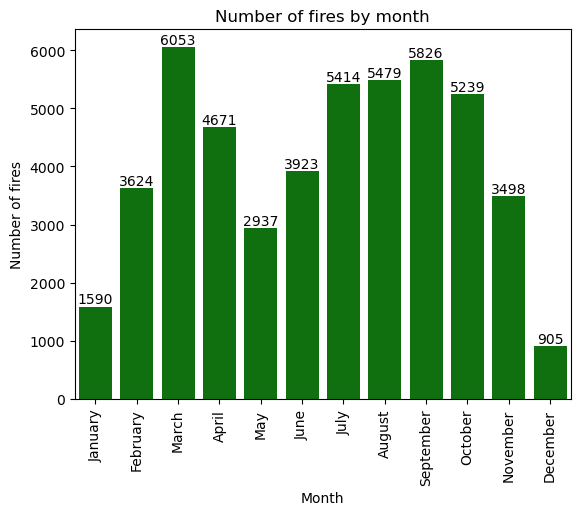

In [84]:
ax = sns.countplot(x=fire.start_month.sort_values(),color='g')

ax.bar_label(ax.containers[0])

plt.title('Number of fires by month')
plt.ylabel('Number of fires')
plt.xlabel('Month')
plt.xticks([x-1 for x in month_num],month_word,rotation=90)

plt.show()

Surprisingly, it appears that **March** is the month that the most fires have been recorded in, with the months of **July, August, September and October** following very close while the least amount of fires were recorded in December quiet expectedly. To understand this information better, we should also compare the severity of the fires recorded in each month, i.e. the total area burned each month. This time let us also add another level of detail: the year the fires began.

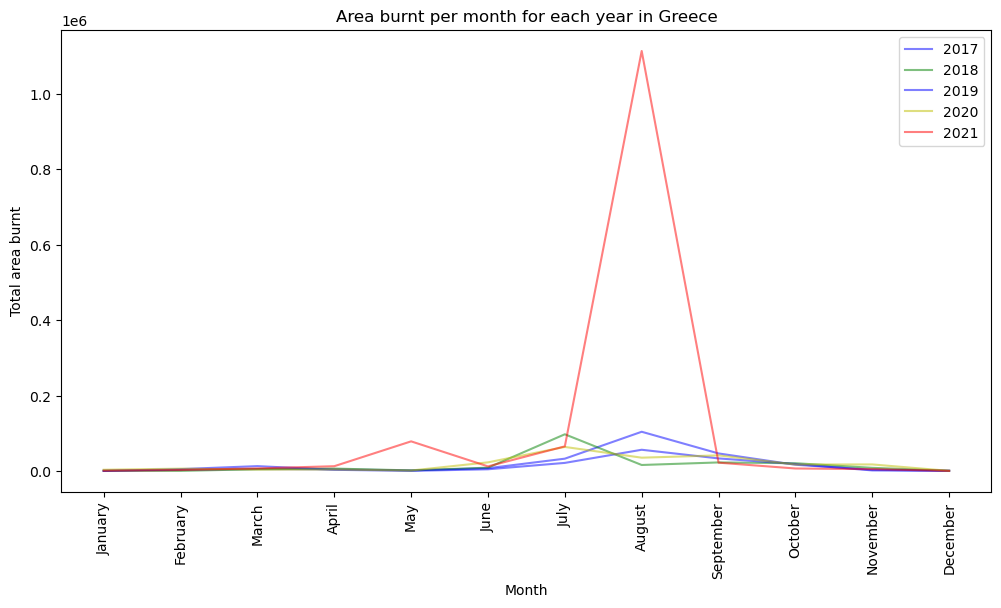

In [81]:
months = [month for month,df in fire.groupby('start_month')]
color_year = {2017:'b',2018:'g',2019:'b',2020:'y',2021:'r'}

plt.figure(figsize=(12,6))

for year in fire.start_date.dt.year.unique():
    plt.plot(months,fire.loc[fire.start_date.dt.year==year,['start_month','total_area']].groupby('start_month').sum().total_area,
                                                                                                                            alpha=0.5,
                                                                                                                            color=color_year[year],
                                                                                                                            label=year)
plt.xticks(month_num,month_word,rotation=90)
plt.legend(loc='upper right')
plt.ylabel('Total area burnt')
plt.title('Area burnt per month for each year in Greece')
plt.xlabel('Month')

plt.show()

The picture now looks vastly different. In every single year the most severe fires (severity is synonymous with large total area burned) took place during the Summer months. The least severe fires took place in 2020, while the **most devastating period** was by far the **August of 2021** with over **1 million acres** burned. This can also be seen more concretely with the following heat map.

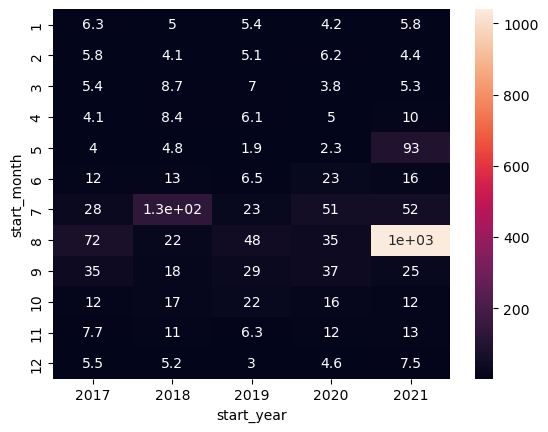

In [51]:
pivot = pd.pivot_table(fire,columns='start_year',index='start_month',values='total_area')
sns.heatmap(pivot,annot=True);

## Section 4: Comparing times of the day in terms of number and severity of fires recorded

Let's also compare the **time of the day** according to the **number of fires** that started at this time. We will also **color** the bars according the the **mean severity** of the fires recorded at each time.

In [99]:
measure_of_severity = fire.groupby(fire.start_date.dt.hour).sum().total_area / fire.groupby(fire.start_date.dt.hour).count().total_area
measure_of_severity
color = [{mean<10: (0.2,0,0), 10<=mean<=20: (0.4,0,0), 20<mean<=50: (0.6,0,0),50<mean<=100:(0.8,0,0),mean>100:(1,0,0)}[True] for mean in measure_of_severity]

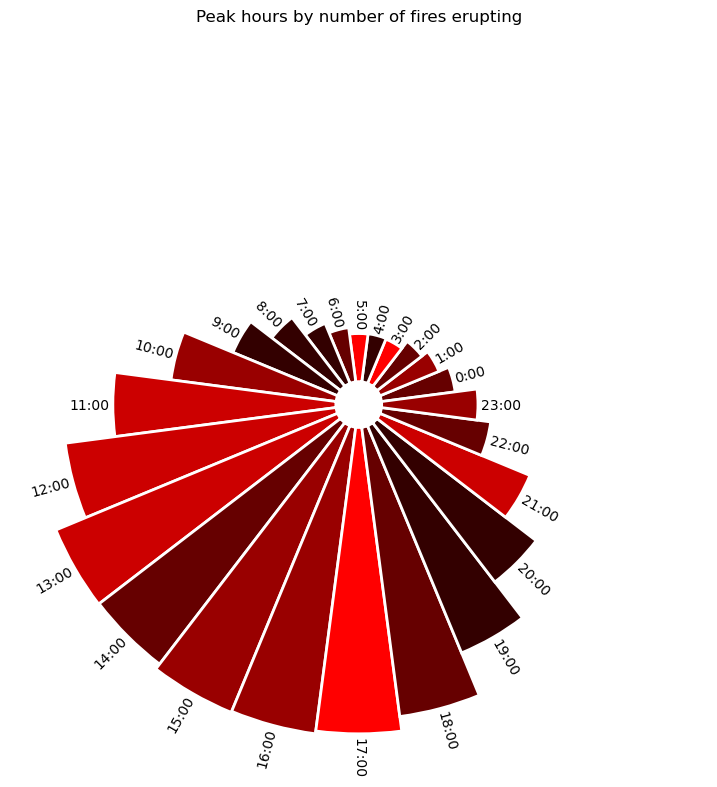

In [100]:
#reference: https://www.python-graph-gallery.com/circular-barplot-basic

plt.figure(figsize=(9,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 100
lowerLimit = 30
labelPadding = 4

count_hour = fire.groupby(fire.start_date.dt.hour).count().start_date
max = count_hour.max()

slope = (max - lowerLimit) / max
heights = slope * count_hour**0.7 + lowerLimit

width = 2*np.pi / len(count_hour.index)

indexes = list(range(1, len(count_hour.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color
)

for bar, angle, height, label in zip(bars,angles, heights, count_hour.index):

    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=str(label)+':00', 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")
plt.title('Peak hours by number of fires erupting')
plt.show()

We note that **most fires start at noon-evening** time as opposed to the night-midnight time when few fires erupt. However, **most severe fires** begin both during **5pm** and during midnight **3-5am**. The first one is more obvious since it most likely is due to the high temperatures and fire convection. The latter though could be a sign of fires spreading more easily due to fire departments not responding fast and strongly enough during the early stages of some of these fires.

## Section 5: What was the response of the fire departments across Greece?

In order to answer this question we will only look at the **number of firefighters and volunteers**, which represents the totality of the human dynamic of the fire departments, as opposed to the rest of the help provided, e.g. military, aeroplanes, to which a significant contribution was made by other countries especially during the 2021 summer wildfires, and so taking them into account for the specific question would be a mistake.

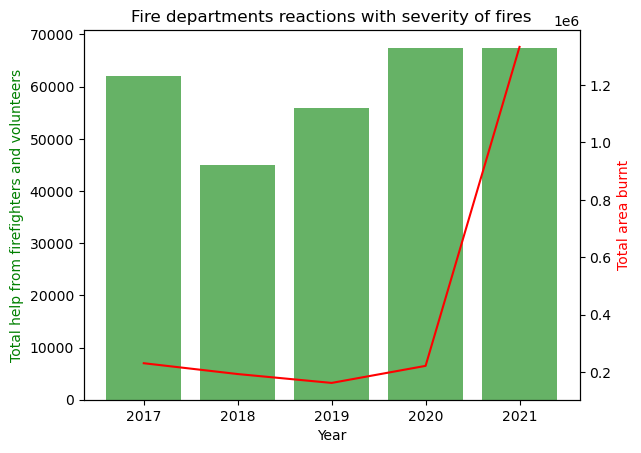

In [54]:
years = [year for year,df in fire.groupby('start_year')]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(years,fire.groupby('start_year').sum().total_area,color='r')
ax1.bar(x=years,height=fire.groupby('start_year').sum().total_firefighters,alpha=0.6,color='g')

ax2.set_ylabel('Total area burnt',color='r')
ax1.set_ylabel('Total help from firefighters and volunteers',color='g')
ax1.set_xlabel('Year')
ax1.set_xticks(years,years)
ax1.set_title('Fire departments reactions with severity of fires')

plt.show()

This is of course in every way a disappointing result. While the **total area** burned from 2020 to 2021 increased by more than **500%**, the number of **firefighters** present in total essentially **did not change**!  
***
We should keep in mind though that this result might have been affected by an **"avalanche effect"**. For example, if a great number of the total number of firefighters were concentrated mostly at the very severe fire spots, other spots that were created at the same time elsewhere would probably have a better chance of expanding. This would create an avalanche effect that would exponentially increase the number of severe fire spots. In order to investigate this hypothesis (partially) let us first look at the worst fires and where they took place during 2021

In [55]:
worst_fires = fire.loc[fire.total_area.sort_values(ascending=False).head(7).index,['District','total_area']].sort_values('total_area',ascending=False).head(7)
index_worst_fires=list(worst_fires.index)
worst_fires

,District,total_area
47604,ΕΥΒΟΙΑΣ,511854.14
45012,ΗΛΕΙΑΣ,121000.00
46328,ΛΑΚΩΝΙΑΣ,101001.71
39735,ΑΤΤΙΚΗΣ,94590.00
39677,ΑΤΤΙΚΗΣ,83774.00
46906,ΚΟΡΙΝΘΙΑΣ,69642.00
45605,ΑΡΚΑΔΙΑΣ,58710.00


For this hypothesis to be able to be tested these fires should have started at around the same time, which indeed they did!

In [56]:
fire.loc[index_worst_fires,['start_date','total_area','District']].sort_values('total_area',ascending=False).head(7)

,start_date,total_area,District
47604,2021-08-03 17:11:00,511854.14,ΕΥΒΟΙΑΣ
45012,2021-08-04 13:03:00,121000.00,ΗΛΕΙΑΣ
46328,2021-08-03 13:10:00,101001.71,ΛΑΚΩΝΙΑΣ
39735,2021-08-16 12:30:00,94590.00,ΑΤΤΙΚΗΣ
39677,2021-08-03 13:22:00,83774.00,ΑΤΤΙΚΗΣ
46906,2021-05-19 21:44:00,69642.00,ΚΟΡΙΝΘΙΑΣ
45605,2021-08-06 21:30:00,58710.00,ΑΡΚΑΔΙΑΣ


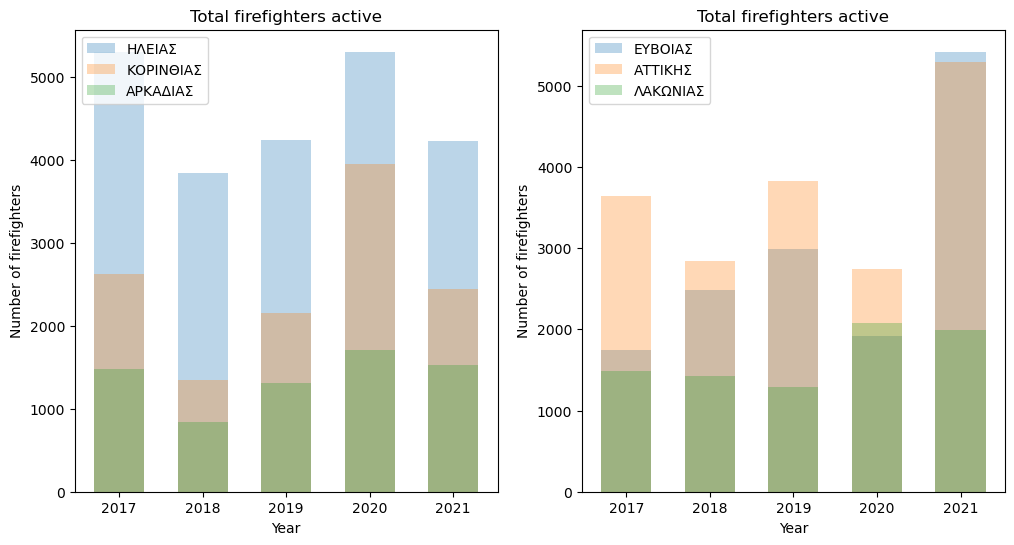

In [57]:
def tot_firef(nomos: str)-> float:
    return fire.loc[fire.District==nomos,['start_year','total_help']].groupby('start_year').sum().total_help


worst_districts = list(fire.loc[fire['start_year']==2021,['total_area','District']].groupby('District').sum().total_area.sort_values(ascending=False).head(6).index)

fig,ax = plt.subplots(1,2,figsize=(12,6))

for district in worst_districts:
    if fire.loc[fire['start_year']==2020,['District','firefighters']].groupby('District').sum().firefighters[district]>fire.loc[fire['start_year']==2021,['District','firefighters']].groupby('District').sum().firefighters[district]:
        ax[0].bar(x=years,height=tot_firef(district),alpha=0.3,width=0.6,label=district)
    else:
        ax[1].bar(x=years,height=tot_firef(district),alpha=0.3,width=0.6,label=district)

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

ax[0].set_xticks(years)
ax[0].set_title('Total firefighters active')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of firefighters')

ax[1].set_xticks(years)
ax[1].set_title('Total firefighters active')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of firefighters')

plt.show()

Our hypothesis might be true, since the **totality** of the firefighting dynamic in Greece is around **17000 firefighters**. The five fires that started together in August of 2021 may have **pressed** the greek fire departments **to their limits** and created an **avalanche effect** due to the departments' inability to take care of new fires. As for the case of the fire in Korinthia, there is not much to say based on this analysis alone, since it had a start so far away from the others.

## Section 6: Probability of catastrophic fires

An interesting analysis we can now do is to check the probablity of new severe fires appearing in districts were at least some number of severe fires have been recorded. This would be a good indicator of where the fire departments should give priority in future emergency periods.

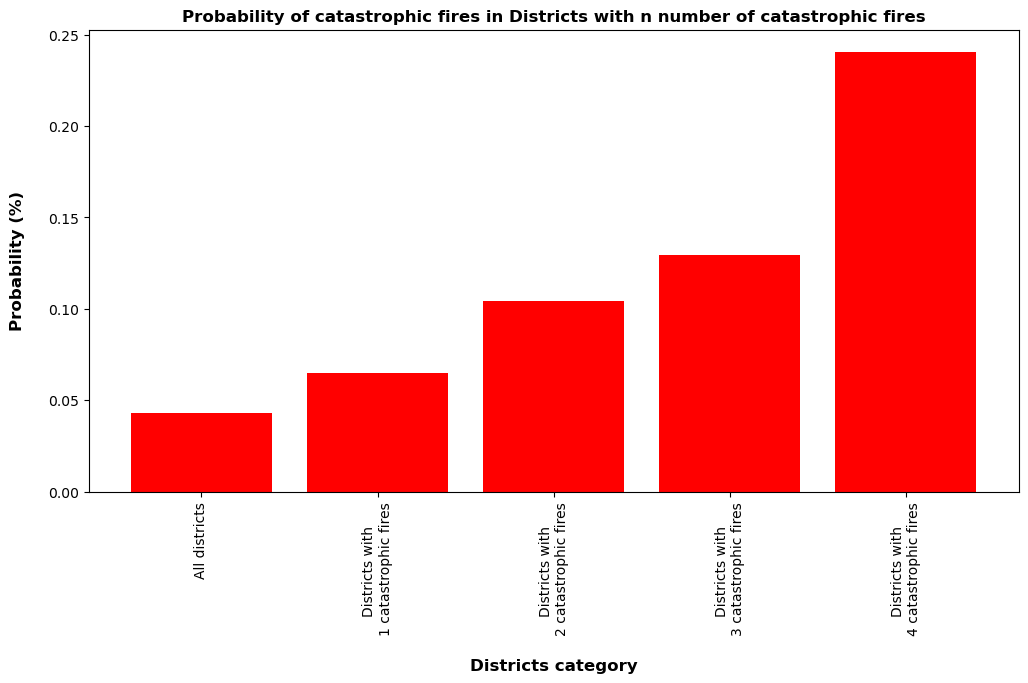

In [58]:
def frequency_of_catastrophic_fires(num: int) -> float:
    '''This function returns the probability of more severe fires erupting in districts with num number of fires.

        Parameters
        num: integer. The number of severe fires the districts of interest have had.'''
        
    assert num>=0, 'num has to be positive'

    if num>0:
        count_by_district = fire[fire.Severity=='catastrophic'].groupby('District').count()

        more_than_num = count_by_district[count_by_district.total_area>=num]

        districts_with_more_than_num = list(more_than_num.index)

        data_of_districts = fire[fire.District.isin(districts_with_more_than_num)]

        frequency = (len(data_of_districts[data_of_districts.Severity=='catastrophic'])-num*len(more_than_num)) / data_of_districts.count().total_area*100
    else:
        frequency = fire[fire.Severity=='catastrophic'].count().total_area/fire.count().total_area*100
    return frequency


rangee = range(0,5)
freq = [frequency_of_catastrophic_fires(num) for num in rangee]
freq_ticks = ['All districts']+[f'Districts with \n{str(x)} catastrophic fires' for x in range(1,5)]


plt.figure(figsize=(12,6))

plt.bar(x=rangee,height=freq,color='red')

plt.title('Probability of catastrophic fires in Districts with n number of catastrophic fires',fontweight='bold')
plt.ylabel('Probability (%)\n',fontsize=12,fontweight='bold')
plt.xlabel('\nDistricts category',fontsize=12,fontweight='bold')
plt.xticks(rangee,freq_ticks,rotation=90)

plt.show()

We observe that **the more severe fires a district has experienced the more likely it is to experience even more**. This probably indicates the **higher natural susceptibility** of these districts to severe fires due to their dry climate, high temperature, vegetation, high wind speed etc. These districts therefore should be the priority of the greek fire departments especially during the dangerous summer period.

## Section 7: What percentage of Euvoia and Greece was burnt in these wildfires?

In [59]:
euvoia_area = 3654*1000
percnt = worst_fires.loc[fire.sort_values('total_area',ascending=False).total_area.head(1).index,'total_area'] / euvoia_area *100

print(f'The percentage of Euvoia that was burnt in the most severe fire of 2021 alone was {int(percnt)}%')

The percentage of Euvoia that was burnt in the most severe fire of 2021 alone was 14%


In [60]:
greece_area = 131957*1000
total_area_burnt = fire.total_area.sum()
percnt_total =  total_area_burnt/greece_area

print(f'The percentage of Greece that has been burnt in the last 5 years is {round(percnt_total*100,1)}% !!')


The percentage of Greece that has been burnt in the last 5 years is 1.6% !!


## Section 8: Total help-duration linear regression | A taste of machine learning

Consider the total_help-duration columns and their potential relationship. There are many different components that determine this relationship that are more or less prevalent across the groupings. Some examples are:
* When a fire is already under control and the antifire zone has been made, fire departments usually let them burn out on their own. This would increase the duration and decrease the total help in some very_low severity fires.
* For purely geometrical reasons, the larger a fire spot becomes the less the additional firefighters needed for every increase in its radius become. This is a non-linear component added to this relationship.
* For the more catastrophic fires it is not unusual to have a constant number of total_help after some time due to the restricted number of firefighters, while the duration keeps increasing. This is another non-linear factor.
* The longer a fire burns the more severe it becomes and the more total help is needed. This is where the linearity in the relationship comes from.
***

However, we predict that the strongest of these factors will be the last and the relationship between these two variables will be approximately linear. In order to investigate this prediction, we first plot our data.

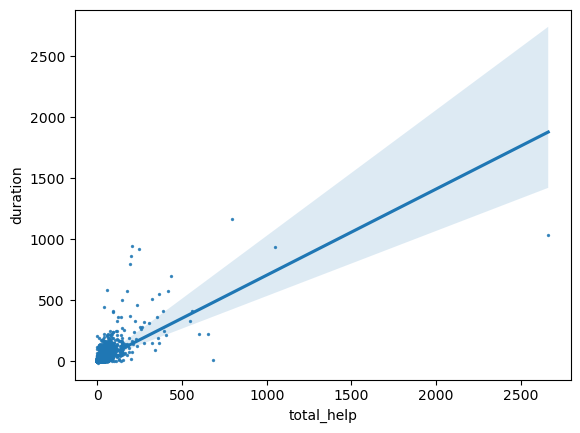

In [61]:
sns.regplot(x='total_help',y='duration',data=fire,scatter_kws={'s':2})
plt.show()

This looks like a linear relationship. To verify this, we build a trivial linear regression model, which can be trained according to a given test size.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def model(test_size:float)->list:   
    moder = fire.copy()
    moder.dropna(subset=['duration','total_help'],inplace=True)

    x = np.array(moder.total_help).reshape((-1, 1)) 
    y = np.array(moder.duration)

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    return [regressor.coef_[0],regressor.score(X_train,y_train),regressor.score(X_test,y_test)]

In [63]:
print(fire[['total_help','duration']].corr())

            total_help  duration
total_help     1.00000   0.70883
duration       0.70883   1.00000


In [64]:
model(0.2)

[0.6702893563955259, 0.47685945013902575, 0.6228085373401843]

We see that indeed there is a **strong linear correlation** between these variables. Before we end this section, we can also look at the respective diagrams for **each** different **severity grouping**.

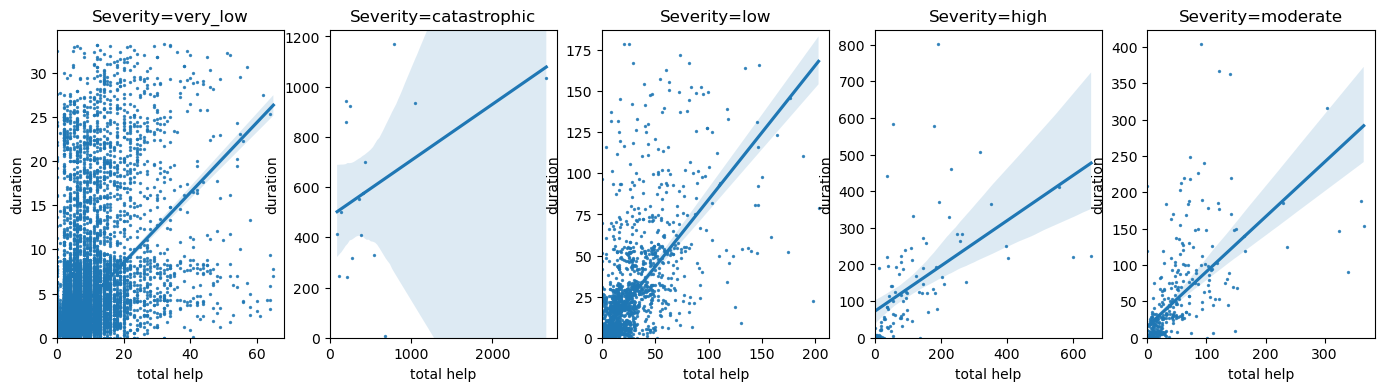

In [86]:
fig,axs = plt.subplots(1,5,figsize=(17,4))

sev = list(fire.Severity.unique())

def plots(num):
    severity = fire[fire.Severity==sev[num]]

    sns.regplot(x='total_help',y='duration',data=fire[fire.Severity==sev[num]],scatter_kws={'s':2},ax=axs[num])

    axs[num].set_ylim(0,severity.duration.max()*1.05)
    axs[num].set_xlim(0)
    axs[num].set_title(f'Severity={sev[num]}')
    axs[num].set_xlabel('total help')

for num,ax in enumerate(axs):
    plots(num)

It is obvious that **the more severe a fire becomes the more non-linear the relationship** between the duration and total_help variables becomes as well. Eventhough this could be a sign of one of the components we earlier mentioned dominating, it is more likely that the reason for this behavior is the more **strict definition** of the lower severity groupings. The very_low and low severities are defined within a much smaller total_area range compared to the high and catastrophic ones. Since there is no reason a-priori to expect total_area not to play a role as well in this relationship, the lower severities do a better job of **isolating** the **dependence** of the **duration** to the **total_help**.

## Section 9: Preparing the data for Tableau

Our final step is to clean our data a bit more before it is ready for Tableau. We first drop some irrelevant columns as well as the nan values that we had no reason to drop earlier. 

In [66]:
fire_tableau = fire.drop(columns=['groves','grass','swamps','farmland','farm_leftovers','wastelands','start_month','start_year'])

In [67]:
fire_tableau.dropna(subset=['latitude','longitude','end_date'],inplace=True)

We also drop the rows with 0 longitude/latitude.

In [68]:
fire_tableau.drop(fire_tableau[fire_tableau.longitude==0].index,inplace=True)
fire_tableau.drop(fire_tableau[fire_tableau.latitude==0].index,inplace=True)
fire_tableau.describe()

,start_time,end_time,latitude,longitude,forests,semi_forests,firefighters,volunteers,other forces,army,on-foot,total_area,total_help,total_firefighters,duration
count,15061,15061,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000,15061.000000
mean,0 days 15:24:31.113471881,0 days 16:22:44.538875240,39.022994,22.936968,30.262594,24.170374,5.829294,0.191289,0.351238,0.031007,0.600359,88.714324,6.842940,6.620942,4.776444
std,0 days 03:58:02.771719214,0 days 04:36:43.610404596,1.647095,1.629362,2440.630078,843.958236,19.411347,1.366695,10.555060,1.199284,6.808008,4506.283106,28.710313,23.794786,26.703469
min,0 days 00:00:00,0 days 00:00:00,34.944736,19.656927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.150000
25%,0 days 13:03:00,0 days 14:04:00,37.882235,21.808396,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,2.000000,2.000000,0.716667
50%,0 days 15:40:00,0 days 17:10:00,39.047738,22.470493,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.700000,3.000000,3.000000,1.250000
75%,0 days 18:10:00,0 days 19:40:00,40.704987,23.911710,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,6.000000,2.500000
max,0 days 23:58:00,0 days 23:59:00,41.736240,28.235455,288428.470000,55282.000000,1513.000000,40.000000,1270.000000,101.000000,620.000000,511854.140000,2661.000000,1519.000000,1032.950000


Now, for the geolocation of Tableau to work, we need to perform a reverse geocoding based on the geographical coordinates that we have. This will be done with the help of https://api.maptiler.com/geocoding geocoding API. The results will be saved in the regg pandas dataframe.

In [69]:
districts_total_help_coordinates = fire_tableau[fire_tableau.start_date.dt.year==2021].groupby('District').agg({'total_area':'sum','longitude':'median','latitude':'median'})

In [70]:
long_lat=list(zip(list(districts_total_help_coordinates.loc[:,['longitude','latitude']].longitude),list(districts_total_help_coordinates.loc[:,['longitude','latitude']].latitude),list(districts_total_help_coordinates.total_area)))

In [71]:
import requests
import time

api_key = '2mckjlHAWYwCw0TYarpn'
regg = pd.DataFrame(columns=['Region','total_area'])

long_lat=list(zip(list(districts_total_help_coordinates.loc[:,['longitude','latitude']].longitude),list(districts_total_help_coordinates.loc[:,['longitude','latitude']].latitude),list(districts_total_help_coordinates.total_area)))

for long,lat,help in long_lat:
    url='https://api.maptiler.com/geocoding/'+str(long)+','+str(lat)+'.json?key='+api_key+'&language=en'
    response = requests.get(url).json()
    try:
        region = response['features'][0]['place_name_en'].split(',')[-3]
        regg = regg.append({'Region':region,'total_area':help},ignore_index=True)
    except:
        print('oops')

C:\Users\micha\AppData\Local\Temp\ipykernel_13412\4030050604.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\micha\AppData\Local\Temp\ipykernel_13412\4030050604.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\micha\AppData\Local\Temp\ipykernel_13412\4030050604.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\micha\AppData\Local\Temp\ipykernel_13412\4030050604.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\micha\AppData\Local\Temp\ipykernel_13412\4030050604.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [72]:
regg

,Region,total_area
0,Western Greece,3097.47
1,Peloponnese Region,16.53
2,Peloponnese Region,60613.04
3,Epirus,1857.01
4,Attica,91359.54
5,Western Greece,9126.85
6,Central Greece,3033.23
7,Western Macedonia,12416.51
8,Eastern Macedonia and Thrace,1186.41
9,South Aegean,102.21


We also remove a space at the first position of each region that was automatically generated.

In [73]:
new_names = [name[1:] for name in regg.Region]
renaming = dict(list(zip(list(regg.Region),new_names)))
regg.replace(renaming,inplace=True)

In [74]:
regg

,Region,total_area
0,Western Greece,3097.47
1,Peloponnese Region,16.53
2,Peloponnese Region,60613.04
3,Epirus,1857.01
4,Attica,91359.54
5,Western Greece,9126.85
6,Central Greece,3033.23
7,Western Macedonia,12416.51
8,Eastern Macedonia and Thrace,1186.41
9,South Aegean,102.21


One final renaming

In [75]:
regg.replace({'Region of Crete':'Crete','Northern Aegean':'North Aegean','Peloponnese Region':'Peloponnese'},inplace=True)

In [76]:
regg

,Region,total_area
0,Western Greece,3097.47
1,Peloponnese,16.53
2,Peloponnese,60613.04
3,Epirus,1857.01
4,Attica,91359.54
5,Western Greece,9126.85
6,Central Greece,3033.23
7,Western Macedonia,12416.51
8,Eastern Macedonia and Thrace,1186.41
9,South Aegean,102.21


And we finally create csv files from both the main general dataframe and the region-total area data frane.

In [ ]:
regg.to_csv('region_help.csv',index=False)
fire_tableau.to_csv('FIRE.csv',index=False)